In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import pandas as pd

In [2]:
def plotIteration(data, x_col, y_cols, ylabels, xlabel, ylabel, title=None):
    # Convert to numpy array for easier indexing
    data = np.array(data)

    # Extract columns
    x = data[:, x_col]

    plt.figure(figsize=(6, 4))
    for y_col, y_label in zip(y_cols, ylabels):
      y = data[:, y_col]
      plt.plot(x, y, marker="o", linestyle="-", label=f" {y_label} vs {xlabel}")

    # Plot

    plt.plot(x, y, marker="o", linestyle="-", label=f"col {y_col} vs col {x_col}")
    plt.xlabel(xlabel if xlabel else f"Column {x_col}")
    plt.ylabel(ylabel if ylabel else f"Column {y_col}")
    plt.title(title if title else f"Plot of col {y_col} vs col {x_col}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
def NewtonRaphson(expr,x0,tolr):
  x = sy.symbols('x')
  f = sy.sympify(expr)
  f0 = f.subs(x,x0)
  df0 = sy.diff(f,x).subs(x,x0)
  values = []
  for i in range(40):
    values.append([i,x0,f0,df0])
    df = sy.diff(f,x).subs(x,x0)
    x1 = x0 - f0/df0
    f1 = f.subs(x,x1)
    x0 = x1
    f0 = f1
    df0 = df
    if abs(f1) <= tolr:
      break
  return [x0,values]


The root is: 16.2095279764315 for a tolerance equals 1e-10


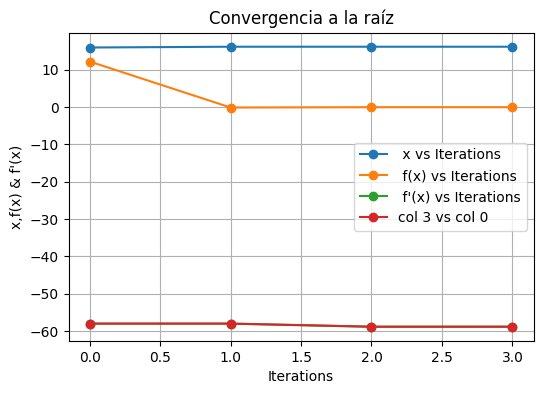

   k                x0                f(x0)       d^(k+1)f(x0)
0  0              16.0     12.2448943705824  -58.0244894370582
1  1  16.2110297650075  -0.0883897392700419  -58.0244894370582
2  2  16.2095064471786  0.00126706826608824  -58.8592527231465
3  3  16.2095279742658  1.27455450638081e-7  -58.8532898891772


In [13]:
expr = input("Enter the function: ")
x0 = float(input("Enter the initial guess: "))
tol = eval(input("Enter the tolerance: "))
root = NewtonRaphson(expr,x0,tol)
if root:
  print("The root is: " + str(root[0]) + " for a tolerance equals " + str(10 ** -10))
  plotIteration(root[1],0,[1,2,3],["x","f(x)","f'(x)"],"Iterations","x,f(x) & f'(x)", "Convergencia a la raíz")
  dt_Newton = pd.DataFrame(root[1])
  dt_Newton.columns = ["k","x0","f(x0)","d^(k+1)f(x0)"]
  print(dt_Newton)
  
